In [1]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

In [2]:
nt = 50           # number of temperature points
N=10              # size of lattice, N x N
eqsteps = 100     # number of MC sweeps for equilibration
mcsteps = 100     # number of MC sweeps for calculation

T = np.linspace(1.53, 3.28, nt)
Energy, Magnetization, SpecificHeat, Susceptibility = np.zeros(nt), np.zeros(nt), np.zeros(nt), np.zeros(nt)
n=1/(mcsteps*N*N)

In [3]:
state = 2*np.random.randint(2,size=(N,N))-1 
print(state) 

[[ 1  1  1 -1  1 -1 -1  1 -1  1]
 [ 1  1 -1 -1 -1 -1  1 -1  1 -1]
 [ 1 -1  1  1 -1  1  1  1 -1 -1]
 [ 1 -1 -1  1 -1  1  1  1 -1  1]
 [-1  1  1  1  1  1 -1  1  1  1]
 [ 1 -1 -1 -1 -1  1  1  1 -1 -1]
 [ 1  1  1 -1  1 -1 -1 -1  1 -1]
 [-1 -1 -1 -1  1 -1 -1  1  1 -1]
 [-1 -1 -1 -1  1 -1 -1  1 -1 -1]
 [-1  1 -1 -1  1  1 -1 -1 -1  1]]


In [4]:
for t in range(nt):
    Beta = 1/T[t]

    for i in range(eqsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i
    E=0
    M=0
    for i in range(mcsteps):
        for j in range(N):
            for k in range(N):
                a = np.random.randint(0, N)
                b = np.random.randint(0, N)
                sig_i =  state[a, b]
                sig_j = state[(a+1)%N,b] + state[(a-1)%N,b] + state[a,(b+1)%N] + state[a,(b-1)%N]
                delta_E = 2*sig_i*sig_j

                if delta_E <0:
                    sig_i *= -1
                elif rand() < np.exp(-delta_E*Beta):
                    sig_i *= -1
                state[a,b] = sig_i

        E += -sig_i*sig_j
        M += np.sum(state)
    
    Energy[t] = n*E
    Magnetization[t] = M*n





In [5]:
Energy

array([-0.0384, -0.039 , -0.0388, -0.0388, -0.0364, -0.0376, -0.0354,
       -0.0386, -0.0386, -0.0374, -0.0374, -0.0362, -0.0352, -0.0352,
       -0.033 , -0.0344, -0.0352, -0.032 , -0.0314, -0.0316, -0.029 ,
       -0.034 , -0.0298, -0.028 , -0.0248, -0.0238, -0.0238, -0.0198,
       -0.0292, -0.0246, -0.023 , -0.0192, -0.0168, -0.0214, -0.0194,
       -0.0182, -0.0162, -0.0182, -0.0152, -0.0234, -0.0198, -0.0178,
       -0.0112, -0.015 , -0.0136, -0.0136, -0.015 , -0.0182, -0.0132,
       -0.0122])

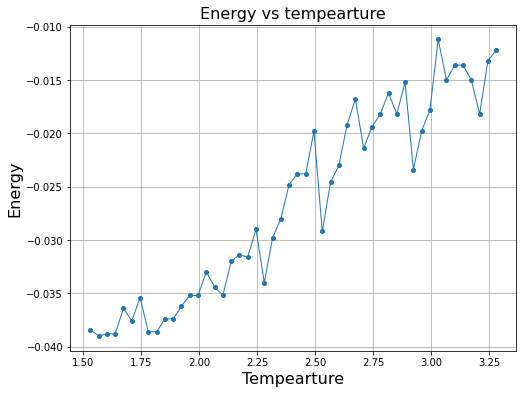

In [6]:
plt.figure(figsize=(8,6))
plt.plot(T,Energy,'o-',lw=1, ms=4)
plt.title('Energy vs tempearture',fontsize=16)
plt.xlabel('Tempearture',fontsize=16)
plt.ylabel('Energy',fontsize=16)
plt.grid()




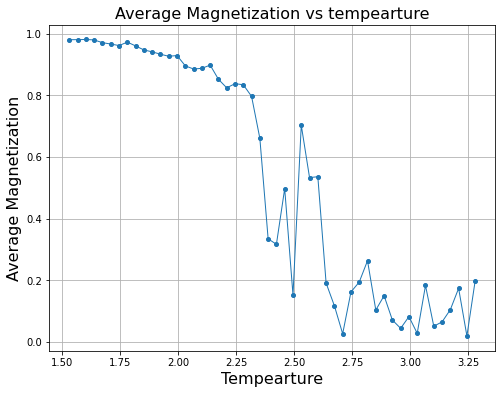

In [7]:
plt.figure(figsize=(8,6))
plt.plot(T,abs(Magnetization),'o-',lw=1, ms=4)
plt.title('Average Magnetization vs tempearture',fontsize=16)
plt.xlabel('Tempearture',fontsize=16)
plt.ylabel('Average Magnetization',fontsize=16)
plt.grid()

In [8]:
np.exp(-delta_E*Beta)
print(state)

[[-1  1  1 -1  1  1  1 -1  1 -1]
 [-1 -1  1  1  1  1  1 -1  1 -1]
 [ 1  1  1  1  1  1  1  1  1 -1]
 [ 1  1  1  1  1  1  1  1  1  1]
 [ 1 -1  1  1  1  1  1  1  1  1]
 [ 1  1 -1 -1 -1 -1 -1  1 -1 -1]
 [ 1  1  1  1 -1 -1 -1 -1 -1  1]
 [-1  1  1  1  1 -1 -1  1 -1 -1]
 [-1  1  1  1  1  1  1  1  1 -1]
 [-1  1 -1 -1  1 -1  1  1  1 -1]]


In [12]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt
import numba 
from numba import njit

In [18]:
N = 100
lattice = 2*np.random.randint(2,size=(N,N))-1 

Text(0.5, 1.0, 'Initial spin configuartion')

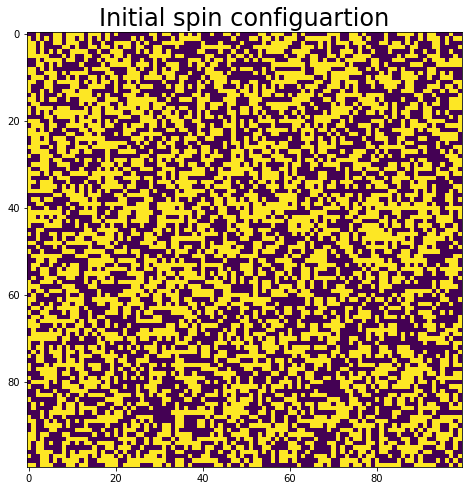

In [25]:
plt.figure(figsize=(8,8))
plt.imshow(lattice)
plt.title('Initial spin configuartion',fontsize=24)